1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [6]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [12]:
# Loading data
filename = '../data/iris.csv'
df = pd.read_csv(filename)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [9]:
# Creating X and y variables
X = np.array(df.iloc[:, :-1])
y = np.array(df['variety'])
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (150, 4)
y shape: (150,)


In [10]:
# Label Encoder transform allows us to map string groups to number classes
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y
# We have transformed the varieties into number groups: [0 - Setosa, 1 - Versicolor, 2 - Virginica] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


# K = 3

In [14]:
# Creating a KNN Model
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets

model.fit(X_train, y_train)  # Memorize some trivial features between 'features' and 'label'

KNeighborsClassifier(n_neighbors=3)

In [16]:
#Predict Output with example_1
y_pred1 = model.predict([[15.7, 2.8, 9.5, 0.1]])
y_pred1
# Predicted variety: Virginica

array([2])

In [17]:
#Predict Output with example_2
y_pred2 = model.predict([[1.7, 3.8, 4.5, 11.3]])
y_pred2
# Predicted variety: Virginica

array([2])

In [19]:
# Score of our model
print('Score:', model.score(X_train, y_train))

Score: 0.9666666666666667


# K = 7

In [20]:
# Creating a KNN Model
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets

model.fit(X_train, y_train)  # Memorize some trivial features between 'features' and 'label'

KNeighborsClassifier(n_neighbors=3)

In [21]:
#Predict Output with example_1
y_pred1 = model.predict([[15.7, 2.8, 9.5, 0.1]])
y_pred1
# Predicted variety: Virginica

array([2])

In [22]:
#Predict Output with example_2
y_pred2 = model.predict([[1.7, 3.8, 4.5, 11.3]])
y_pred2
# Predicted variety: Virginica

array([2])

In [23]:
# Score of our model
print('Score:', model.score(X_train, y_train))

Score: 0.9666666666666667


The predictions have been exactly the same using k=3 and k=7

# Scores of different models using K = [1 - 20]

In [24]:
scores = []
k_list = list(range(1, 21))
for k in k_list:
    # Creating a KNN Model
    model = KNeighborsClassifier(n_neighbors=k)
    # Train the model using the training sets
    model.fit(X_train, y_train)  # Memorize some trivial features between 'features' and 'label'   
    # Score of our model
    scores.append(model.score(X_train, y_train))  

Text(0, 0.5, 'Score')

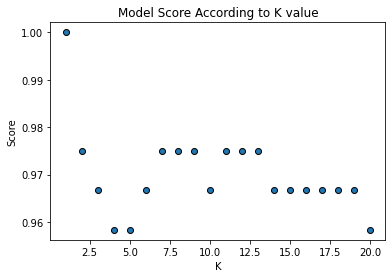

In [27]:
# Visualization
plt.scatter(k_list, scores, cmap='red', edgecolors='black')
plt.title('Model Score According to K value')
plt.xlabel('K')
plt.ylabel('Score')

As we can see, in this case the classification had a highes score at k = 1

# Using 60 test 40 train

In [28]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=17)
print(X_train.shape)
print(X_test.shape)

(60, 4)
(90, 4)


In [29]:
scores = []
k_list = list(range(1, 21))
for k in k_list:
    # Creating a KNN Model
    model = KNeighborsClassifier(n_neighbors=k)
    # Train the model using the training sets
    model.fit(X_train, y_train)  # Memorize some trivial features between 'features' and 'label'   
    # Score of our model
    scores.append(model.score(X_train, y_train))  

Text(0, 0.5, 'Score')

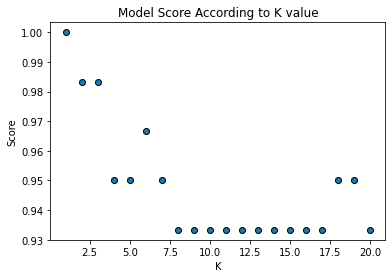

In [30]:
# Visualization
plt.scatter(k_list, scores, cmap='red', edgecolors='black')
plt.title('Model Score According to K value')
plt.xlabel('K')
plt.ylabel('Score')

Using a test size of 60 percent, we can see that the model score has dropped a little bit with a minimum score of 0.93 for k = [8-17]. Some precision can be lost if the model is not trained with enough data. Although a score of 0.93 does not represent a bad classification overall

# Eliminating Setosa

In [47]:
# Creating X and y variables
X = np.array(df[df['variety'] != 'Setosa'].iloc[:, :-1])
y = np.array(df[df['variety'] != 'Setosa']['variety'])
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (100, 4)
y shape: (100,)


In [48]:
# Label Encoder transform allows us to map string groups to number classes
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)
print(X_train.shape)
print(X_test.shape)

(80, 4)
(20, 4)


## Using K = 3

In [50]:
# Creating a KNN Model
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets

model.fit(X_train, y_train)  # Memorize some trivial features between 'features' and 'label'

KNeighborsClassifier(n_neighbors=3)

In [51]:
#Predict Output with example_1
y_pred1 = model.predict([[15.7, 2.8, 9.5, 0.1]])
y_pred1
# Predicted variety: Virginica

array([1])

In [52]:
#Predict Output with example_2
y_pred2 = model.predict([[1.7, 3.8, 4.5, 11.3]])
y_pred2
# Predicted variety: Virginica

array([1])

In [53]:
# Score of our model
print('Score:', model.score(X_train, y_train))

Score: 0.9625


## Using K = 7

In [54]:
model = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets

model.fit(X_train, y_train)  # Memorize some trivial features between 'features' and 'label'

KNeighborsClassifier(n_neighbors=7)

In [55]:
#Predict Output with example_1
y_pred1 = model.predict([[15.7, 2.8, 9.5, 0.1]])
y_pred1
# Predicted variety: Virginica

array([1])

In [56]:
#Predict Output with example_2
y_pred2 = model.predict([[1.7, 3.8, 4.5, 11.3]])
y_pred2
# Predicted variety: Virginica

array([1])

In [57]:
# Score of our model
print('Score:', model.score(X_train, y_train))

Score: 0.975


In this case, the score was higher for k = 7, although the prediction was the same for each of the examples

# Verdict: Is KNN the appropriate algorithm for these data?

I would have to say yes, because the scores of the models were very high. Although the types of data would benefit with different classification algorithms that could better handle the numerical data of the X variable.